Dataset loaded successfully.
 Visualizing missing data...


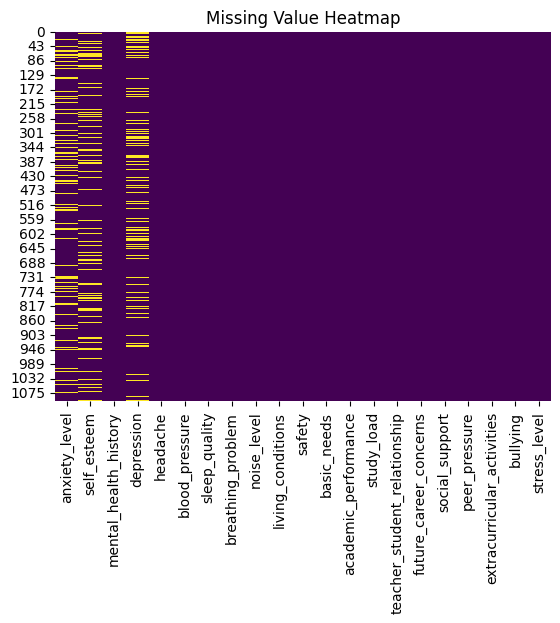

 Running Mean Imputation...
 Running KNN Imputation...
 Running MICE (Iterative) Imputation...

 Imputation completed. Files saved:
 - simulated_missing_data.csv
 - mean_imputed_data.csv
 - knn_imputed_data.csv
 - mice_imputed_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

try:
    df_original = pd.read_csv("StressLevelDataset.csv") 
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(" Error: 'StressLevelDataset.csv' not found.")
    exit()
df_missing = df_original.copy()
np.random.seed(42)
for col in ['anxiety_level', 'self_esteem', 'depression']:
    df_missing.loc[df_missing.sample(frac=0.2).index, col] = np.nan
print(" Visualizing missing data...")
sns.heatmap(df_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()
print(" Running Mean Imputation...")
mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = df_missing.copy()
df_mean_imputed[['anxiety_level', 'self_esteem', 'depression']] = mean_imputer.fit_transform(
    df_mean_imputed[['anxiety_level', 'self_esteem', 'depression']]
)
print(" Running KNN Imputation...")
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = df_missing.copy()
df_knn_imputed[['anxiety_level', 'self_esteem', 'depression']] = knn_imputer.fit_transform(
    df_knn_imputed[['anxiety_level', 'self_esteem', 'depression']]
)
print(" Running MICE (Iterative) Imputation...")
mice_imputer = IterativeImputer(random_state=0)
df_mice_imputed = df_missing.copy()
df_mice_imputed[['anxiety_level', 'self_esteem', 'depression']] = mice_imputer.fit_transform(
    df_mice_imputed[['anxiety_level', 'self_esteem', 'depression']]
)
df_missing.to_csv("simulated_missing_data.csv", index=False)
df_mean_imputed.to_csv("mean_imputed_data.csv", index=False)
df_knn_imputed.to_csv("knn_imputed_data.csv", index=False)
df_mice_imputed.to_csv("mice_imputed_data.csv", index=False)

print("\n Imputation completed. Files saved:")
print(" - simulated_missing_data.csv")
print(" - mean_imputed_data.csv")
print(" - knn_imputed_data.csv")
print(" - mice_imputed_data.csv")
